# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Using the original dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [2]:
# your code goes here
import pandas as pd
import numpy as np
#read data as amarketing_customer_analysis
marketing_customer_analysis = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')

In [2]:
marketing_customer_analysis.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
marketing_customer_analysis.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [4]:
#get unique values of each column
marketing_customer_analysis['Response'].unique()

array(['No', 'Yes', nan], dtype=object)

In [5]:
#firts we create a data frame for customers with total claim above 1000,a nd have response 'yes' to marketing campain and call it aggregate1
aggregate1 = marketing_customer_analysis[(marketing_customer_analysis['Total Claim Amount'] > 1000) & (marketing_customer_analysis['Response'] == 'Yes')] \
    .groupby(['Customer', 'Response'])['Total Claim Amount'].sum().reset_index()

display(aggregate1.head())
aggregate1.shape

,Customer,Response,Total Claim Amount
0,AJ89108,Yes,1358.400000
1,CG15505,Yes,1294.700423
2,CK39096,Yes,1027.000029
3,DT77901,Yes,1300.800000
4,FD73388,Yes,1261.319869


(60, 3)

In [6]:
#next we aggregate average total claim based on gender and policy type for customers that answered yes to marketing campain and call it aggregate3
aggregate2 = marketing_customer_analysis[marketing_customer_analysis['Response'] == 'Yes'].reset_index().drop(['index','Unnamed: 0'], axis=1)
display(aggregate2.head())
#now group by gender and policy type and calculate mean of total claim amount
aggregate3= aggregate2.groupby(['Gender', 'Policy Type'])['Total Claim Amount'].mean().reset_index().round(2)
display(aggregate3.head(6))
aggregate3.shape





,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
1,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
2,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,79487,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
3,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,41479,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
4,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,63774,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN


,Gender,Policy Type,Total Claim Amount
0,F,Corporate Auto,433.74
1,F,Personal Auto,452.97
2,F,Special Auto,453.28
3,M,Corporate Auto,408.58
4,M,Personal Auto,457.01
5,M,Special Auto,429.53


(6, 3)

On average women with corporate and special auto claimed more in insurance than their male counterpart with similar insurance policy. For personal auto policy cover made more claims than there female counterpart.  

In [7]:
#group number of customers by their state and call it aggregate4
aggregate4 = marketing_customer_analysis.groupby(['State'])['Customer'].count().reset_index()
display(aggregate4.head())
display(aggregate4.shape)
#filter state with more than 500 customers
aggregate6 = aggregate4[aggregate4['Customer'] > 500]
display(aggregate6.head())
aggregate6.shape

,State,Customer
0,Arizona,1937
1,California,3552
2,Nevada,993
3,Oregon,2909
4,Washington,888


(5, 2)

,State,Customer
0,Arizona,1937
1,California,3552
2,Nevada,993
3,Oregon,2909
4,Washington,888


(5, 2)

In [8]:
#group customer lifetime value by education and gender and describe it
aggregate7=marketing_customer_analysis.groupby(['Gender', 'Education'])['Customer Lifetime Value'].agg(['min','max','median']).reset_index().round(2)
display(aggregate7)



,Gender,Education,min,max,median
0,F,Bachelor,1904.00,73225.96,5640.51
1,F,College,1898.68,61850.19,5623.61
2,F,Doctor,2395.57,44856.11,5332.46
3,F,High School or Below,2144.92,55277.45,6039.55
4,F,Master,2417.78,51016.07,5729.86
5,M,Bachelor,1898.01,67907.27,5548.03
6,M,College,1918.12,61134.68,6005.85
7,M,Doctor,2267.60,32677.34,5577.67
8,M,High School or Below,1940.98,83325.38,6286.73
9,M,Master,2272.31,50568.26,5579.10


From the table, the median distribution of the customer lifetime value were closer to the minimum value than to the maximum value, indicating that the distribution is skewed to the left. MThis implies that most customers irrespective of their educational qualification have a low customer lifetime value than average 

LAB | customer-analysis-round-3


In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import data frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#read data as amarketing_customer_analysis2
marketing_customer_analysis2 = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
#show data frame info
marketing_customer_analysis2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
#describe the data frame
marketing_customer_analysis2.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


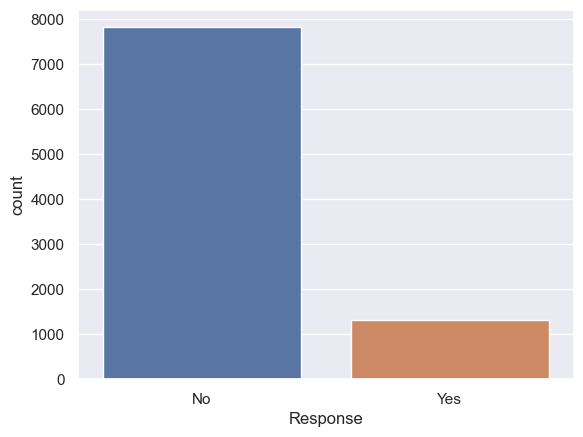

In [5]:
#show a plot of the total number of responses
sns.set_theme(style="darkgrid")
sns.countplot(x='Response', data=marketing_customer_analysis2)
plt.show()


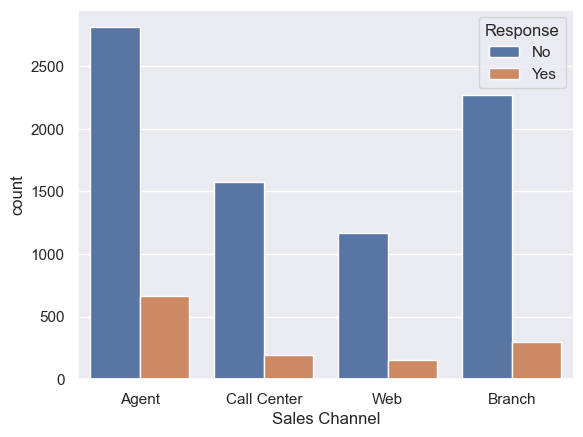

In [6]:
#a plot of response rate by the sales channel
sns.set_theme(style="darkgrid")
sns.countplot(x='Sales Channel', hue='Response', data=marketing_customer_analysis2)
plt.show()


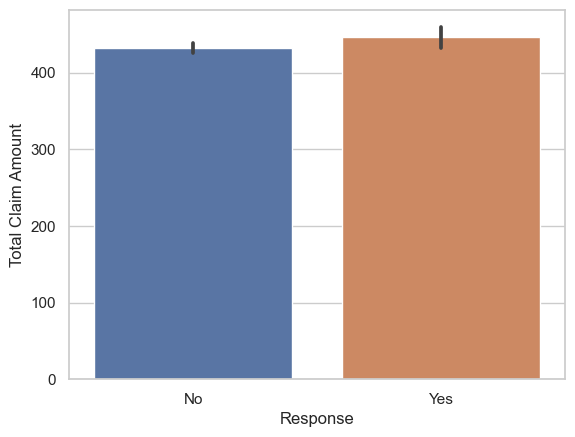

In [7]:
#a barplot of response rate by the total claim amount
sns.set_theme(style="whitegrid")
sns.barplot(x='Response', y='Total Claim Amount', data=marketing_customer_analysis2)
plt.show()


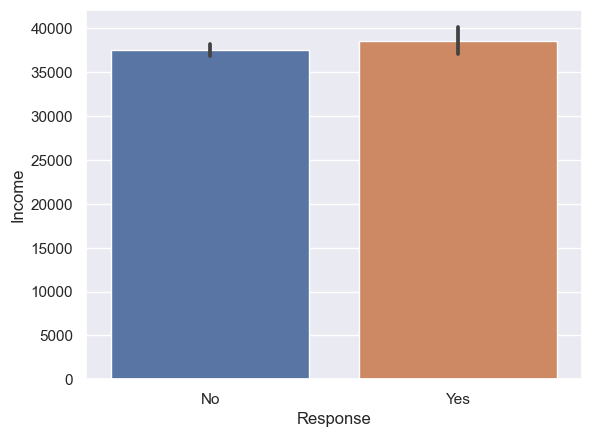

In [8]:
#a barplot of response rate by income
sns.set_theme(style="darkgrid")
sns.barplot(x='Response', y='Income', data=marketing_customer_analysis2)
plt.show()

LAB| DATA TRANSFORMATION

In [3]:
customer_analysis = pd.read_csv('marketing_customer_analysis.csv')

In [6]:
#investigate data types

customer_analysis.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [7]:
customer_analysis.shape #check shape to confirms split was succesful

(9134, 24)

In [8]:
#select categorical columns in a new dataframe called categorical
categoricals=customer_analysis.select_dtypes(include=['object'])


In [9]:
categoricals.head()
categoricals.shape

(9134, 16)

In [10]:
#seperate numerical columns into dataframe called numericals
numericals=customer_analysis.select_dtypes(include=['float64','int64'])
numericals.shape

(9134, 8)

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

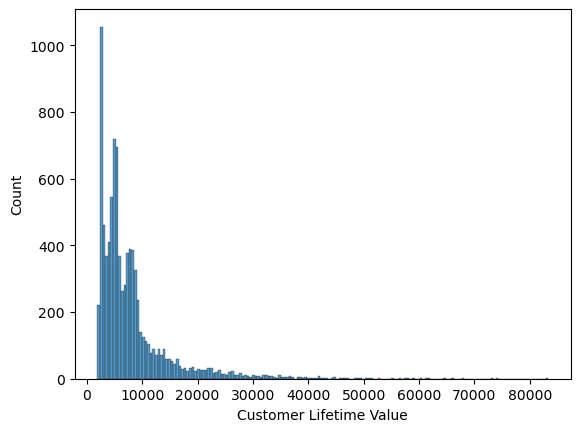

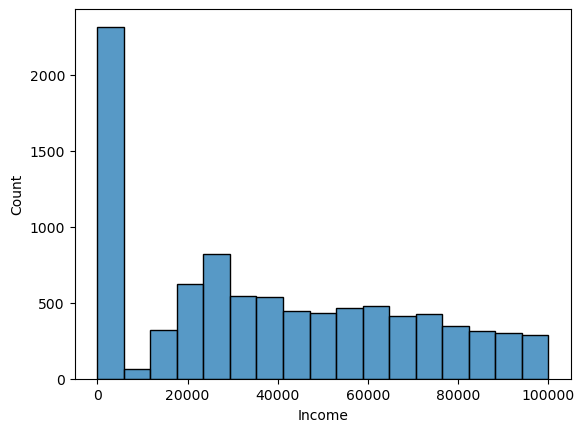

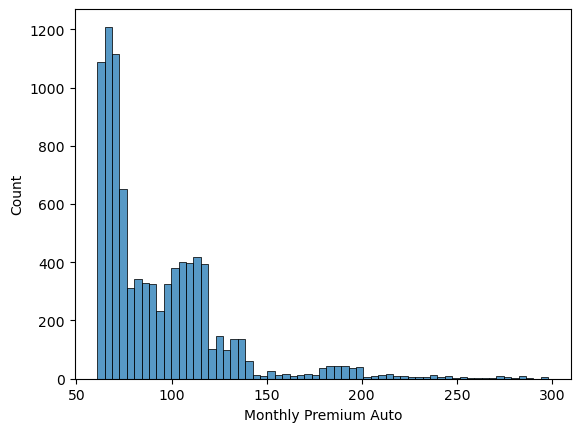

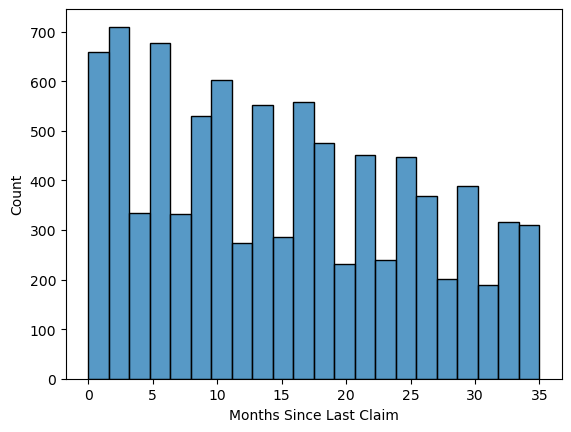

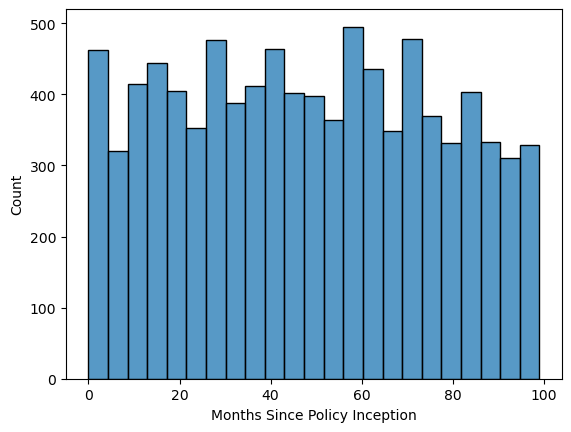

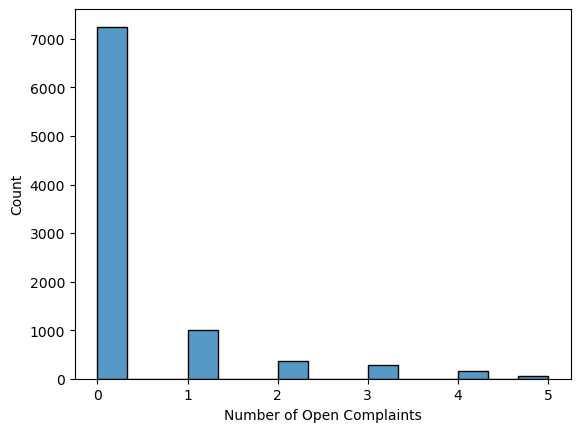

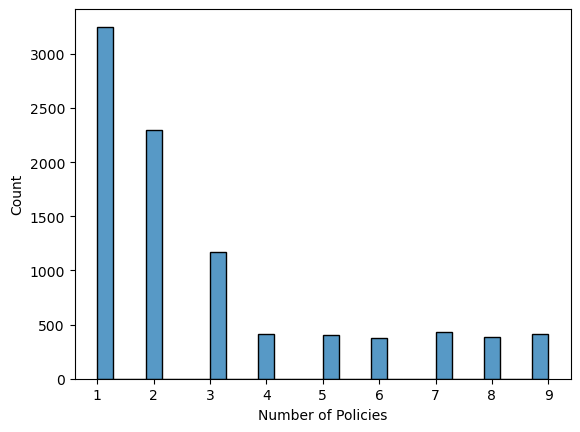

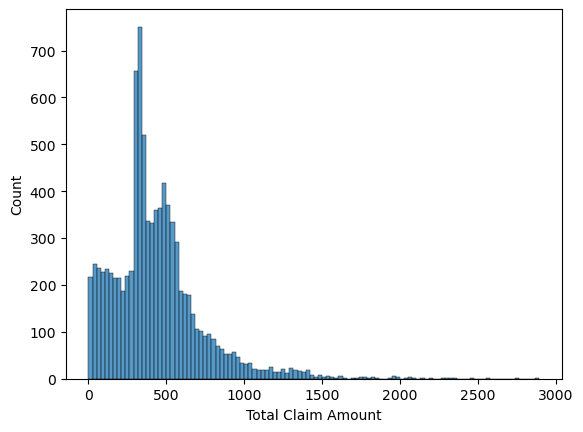

In [12]:
#use seaborn to plot the columns with numerical data
for i in numericals.columns:
    sns.histplot(numericals[i])
    plt.show()

In [13]:
numericals.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [14]:
#compute skewness for all numerical columns and return as a dataframe
skewness=numericals.skew()
skewness=pd.DataFrame(skewness,columns=['skewness'])
display(skewness)

,skewness
Customer Lifetime Value,3.032280
Income,0.286887
Monthly Premium Auto,2.123546
Months Since Last Claim,0.278586
Months Since Policy Inception,0.040165
Number of Open Complaints,2.783263
Number of Policies,1.253333
Total Claim Amount,1.714966


The distribution of value in Customer Lifetime column, Monthly premium auto, number of open complaints connotes thate data in the columns are higly as well as  positively  skewed. it is assumed that the mean, median and mode are positive. Also the distribution has a long tail to the right and can affect modelling. 

Income,Months since policy inception and Months Since last claim all showed  an almost symetrical distributionm with skewness value ranging from 0.2-0.4.This suggest that the data in the columns are almost symmetrical.


In [15]:
#in numerical variables check for multicollinearity between feature, use total_claim_amount as target variable
#use corr() function
corr_matrix=numericals.corr()
display(corr_matrix)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


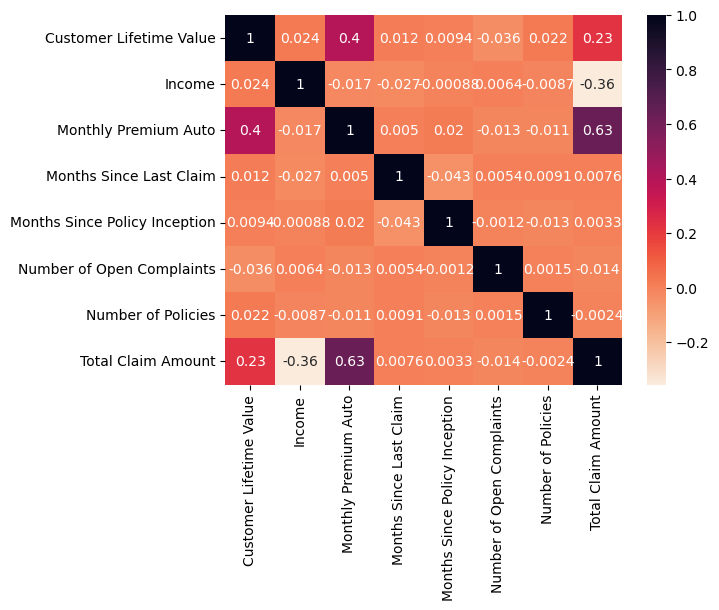

In [16]:
#plot a correlation heatmap
cmap=sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.show()